# Broadcasting

In these exercises, we'll practice using broadcasting to combine arrays of different dimensions.

The exercises here will draw on all the lessons we've seen leading up to this.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(12, 7))

## Bezier Curves

A [Bezier Curve](https://en.wikipedia.org/wiki/B%C3%A9zier_curve) is way to define a two-dimensional curve in terms of a sequence of "control points". Intuitively, each control point "pulls" the path traced by the curve toward itself.

Mathematically, a bezier curve defines a function $B(t)$ from the interval $[0, 1]$ to a two-dimensional point $p$.

Here's an example of a fourth-order bezier curve. You can see that as t moves from 0 to 1, the control points exert different amounts of "force", pulling the final point closer toward themselves.

![images/bezier.gif](images/bezier.gif)

## Exercise: Linear Bezier Curve

The simplest form of bezier curve is a "first-order" bezier curve with two control points $p_0$ and $p_1$. A first-order curve simply traces a line from $p_0$ to $p_1$.

The formula for first-order bezier curve is:

$B(t) = tp_0 + (1 - t)p_1$

Implement a function that evaluates a Bezier curve at a single point. 

Your function should take the following arguments:

- `p0`, a length-2 array containing (x, y) coordinates of the first control point.
- `p1`, a length-2 array containing (x, y) coordinates of the second control point.
- `t`, a scalar value between 0 and 1.

In [2]:
def evaluate_linear_bezier_curve(p0, p1, t):
    raise NotImplementedError()

In [3]:
p0 = np.array([0, 0])
p1 = np.array([2, 1])

halfway = evaluate_linear_bezier_curve(p0, p1, 0.5)
three_quarters = evaluate_linear_bezier_curve(p0, p1, 0.25)

np.testing.assert_almost_equal(halfway, [1.0, 0.5])
np.testing.assert_almost_equal(three_quarters, [1.5, 0.75])

NotImplementedError: 

Implement a function that computes an array of samples from a linear bezier curve. Your function should take the following arguments:

- `p0`, a length-2 array containing (x, y) coordinates of the first control point.
- `p1`, a length-2 array containing (x, y) coordinates of the second control point.
- `ts`, a 1d array of unknown length containing sample values between 0 and 1.

Your function should return a `len(t) x 2` array containing (x, y) coordinates of the requested samples.

In [4]:
def draw_linear_bezier_curve(p0, p1):
    ts = np.linspace(0, 1, 50)
    samples = compute_linear_bezier_curve(p0, p1, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    
    plt.plot(X, Y)
    plt.scatter([p0[0], p1[0]], [p0[1], p1[1]], color='red')

def compute_linear_bezier_curve(p0, p1, ts):
    ts = ts[:, np.newaxis]
    return ts * p0 + (1 - ts) * p1

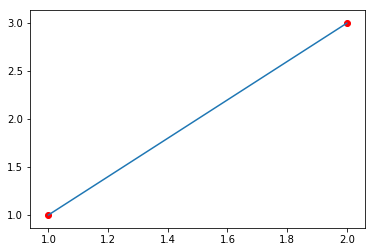

In [5]:
draw_linear_bezier_curve(np.array([1, 1]), np.array([2, 3]));

## Exercise: Quadratic Bezier Curve

The next-simplest form of Bezier Curve is a second-order curve. A second-order Bezier Curve three control points, and can be implemented using the following formula:

$b(t) = (1 - t)^2p_0 + 2(1 - t)tp_1 + t^2p_2$

Implement a function with the same signature as above, but accept three control points, p0, p1, and p2.

In [6]:
def draw_quadratic_bezier_curve(p0, p1, p2):
    ts = np.linspace(0, 1, 50)
    samples = compute_quadratic_bezier_curve(p0, p1, p2, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    points = np.vstack([p0, p1, p2])
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    

def compute_quadratic_bezier_curve(p0, p1, p2, ts):
    ts = ts[:, np.newaxis]
    
    p0_term = (1 - ts) ** 2 * p0
    p1_term = 2 * (1 - ts) * ts * p1
    p2_term = (ts ** 2) * p2
    
    return p0_term + p1_term + p2_term

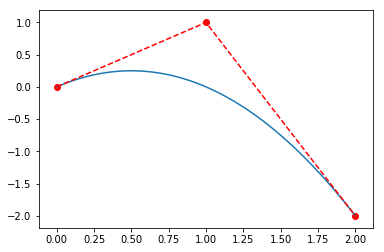

In [7]:
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, -2])
draw_quadratic_bezier_curve(p0, p1, p2)

## Exercise: Cubic Bezier Curve

A cubic Bezier Curve has four control points, and has the following formula:

$b(t) = (1 - t)^3p_0 + 3(1 - t)^2tp_1 + 3(1 - t)t^2p_2 + t^3p_3$

Implement an evaluator for a cubic bezier curve following the same pattern as above.

In [8]:
def draw_cubic_bezier_curve(p0, p1, p2, p3):
    ts = np.linspace(0, 1, 50)
    samples = compute_cubic_bezier_curve(p0, p1, p2, p3, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    points = np.vstack([p0, p1, p2, p3])
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    

def compute_cubic_bezier_curve(p0, p1, p2, p3, ts):
    ts = ts[:, np.newaxis]
    
    p0_term = (1 - ts) ** 3 * p0
    p1_term = 3 * (1 - ts) ** 2 * ts * p1
    p2_term = 3 * (1 - ts) * (ts ** 2) * p2
    p3_term = ts ** 3 * p3
    
    return p0_term + p1_term + p2_term + p3_term

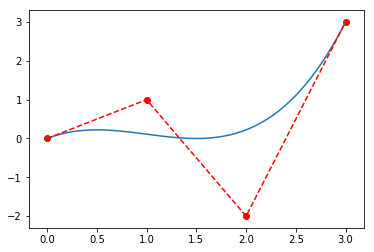

In [9]:
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, -2])
p3 = np.array([3, 3])
draw_cubic_bezier_curve(p0, p1, p2, p3)

## Exercise: Generalized Bezier Curve

You may have started to notice a pattern in the coefficients of each control point's contribution to the curve. We're getting [Binomial Coefficients](https://en.wikipedia.org/wiki/Binomial_coefficient)!

The general formual for a Bezier curve with $n$ control points is:

$b(t) = \sum_{i=0}^n \binom{n}{i}(1 - t)^{n - i}t^ip_i$

where $\binom{n}{i}$ is the binomial coefficient of $n$ and $i$.

Implement a function that computes samples from a generalized bezier curve. It should take a 2d array of (npoints x 2) and a 1d array of samples, and it should return a (len(t) x 2) array of evaluated samples. 

(**Hint:** You can use `scipy.special.comb` to evaluate binomial coefficients.)

In [10]:
from scipy.special import comb

def draw_bezier_curve(points):
    ts = np.linspace(0, 1, 50)
    samples = compute_bezier_curve(points, ts)
    X = samples[:, 0]
    Y = samples[:, 1]
    plt.plot(X, Y)
    
    plt.scatter(points[:, 0], points[:, 1], color='red')
    plt.plot(points[:, 0], points[:, 1], linestyle='--', color='red')
    
def compute_bezier_curve(points, t):
    t = t[:, np.newaxis]
    n = len(points) - 1
    i = np.arange(len(points))
    
    # Compute binomial coefficients.
    # Examples:
    #   In [1]: comb(3, np.arange(4))
    #   Out[1]: array([1., 3., 3., 1.])
    #   In [2]: comb(4, np.arange(5))
    #   Out[2]: array([1., 4., 6., 4., 1.])
    #   In [3]: comb(5, np.arange(6))
    #   Out[3]: array([ 1.,  5., 10., 10.,  5.,  1.])
    binomials = comb(n, i)
    
    # Multiply by the interpolation weights at each time-step.
    # This produces a (nsamples x npoints) array containing the coefficients
    # by which to multiply each point at each time.
    weights = binomials * (1 - t) ** (n - i) * t ** i
    
    # At each time-step, we want to multiply all the points by their weights, 
    # and then sum the contributions from each point. 
    # That's precisely what a matrix-multiply does!
    return weights @ points

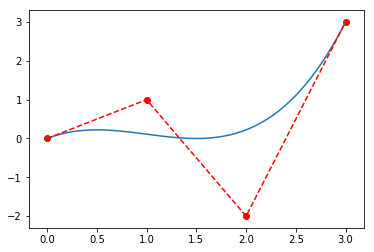

In [11]:
draw_bezier_curve(np.vstack([p0, p1, p2, p3]))

## Exercise: Estimate the Length of a Bezier Curve

Write a function that estimates the length of a bezier curve by computing an array of sample points and summing the difference between each successive point.

In [12]:
def estimate_curve_length(points, nsamples):
    samples = compute_bezier_curve(points, np.linspace(0, 1, nsamples))
    deltas = np.diff(samples, axis=0)
    
    lengths = np.sqrt((deltas ** 2).sum(axis=1))
    total_length = lengths.sum()
    
    return total_length

In [13]:
estimate_curve_length([p0, p1, p2, p3], 5)

5.033940329994518

In [14]:
for i in range(3, 10):
    print(estimate_curve_length([p0, p1, p2, p3], i))

4.854101966249685
4.964603420827521
5.033940329994518
5.07353336566527
5.092520836611209
5.104771190900166
5.112373676140547
